ADF Statistic: -8.767550
p-value: 0.000000
Data is stationary
ARIMA RMSE: 2294028.669


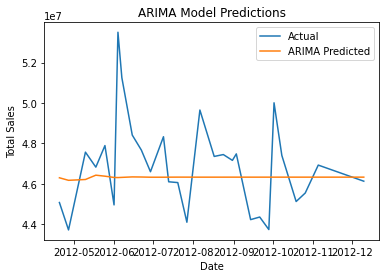

In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Walmart.csv')

# Sort the data by date
df = df.sort_values(by=['Date'])

# Group the data by date and calculate total sales for each day
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Check for stationarity using ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] > 0.05:
    print('Data is not stationary')
else:
    print('Data is stationary')

# ARIMA model
# Fit ARIMA model to the data
model = ARIMA(train['Weekly_Sales'].values, order=(5, 1, 0))
model_fit = model.fit()

# Generate predictions on test set
predictions_arima= model_fit.forecast(steps=len(test))

# Evaluate performance using metrics such as MSE and RMSE
mse_arima = mean_squared_error(test['Weekly_Sales'], predictions_arima)
rmse_arima = sqrt(mse_arima)
print('ARIMA RMSE: %.3f' % rmse_arima)



# Plot the ARIMA results
plt.plot(test['Date'], test['Weekly_Sales'], label='Actual')
plt.plot(test['Date'], predictions_arima, label='ARIMA Predicted')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
AR = plt.show()


Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 [==============================] - 1s 190ms/step - loss: 0.0527
Epoch 2/100
4/4 [==============================] - 1s 190ms/step - loss: 0.0478
Epoch 3/100
4/4 [==============================] - 1s 183ms/step - loss: 0.0426
Epoch 4/100
4/4 [==============================] - 1s 194ms/step - loss: 0.0377
Epoch 5/100
4/4 [==============================] - 1s 131ms/step - loss: 0.0333
Epoch 6/100
4/4 [==============================] - 1s 132ms/step - loss: 0.0281
Epoch 7/100
4/4 [==============================] - 1s 137ms/step - loss: 0.0246
Epoch 8/100
4/4 [==============================] - 1s 149ms/step - loss: 0.0213
Epoch 9/100
4/4 [==============================] - 1s 120ms/step - loss: 0.0199
Epoch 10/100
4/4 [==============================] - 0s 103ms/step - loss: 0.0184
Epoch 11/100
4/4 [==============================] - 0s 96ms/step - loss: 0.0181
Epoch 12/100
4/4 [==============================] - 0s 93ms/step - loss: 0.0198
Epoch 13/100
4/4 [==============================] -

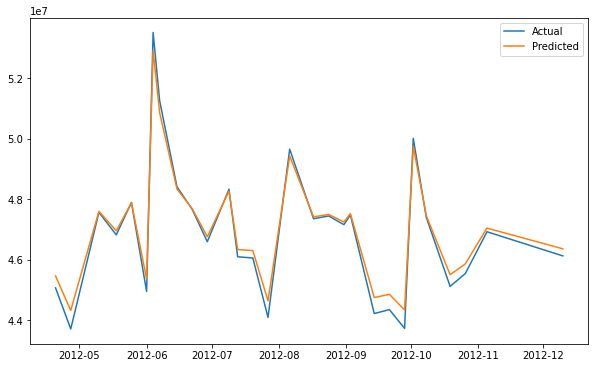

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#Load the Walmart sales dataset
sales_data = pd.read_csv('/content/Walmart.csv')

#Convert the date column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

#Sort the data by date
sales_data = sales_data.sort_values('Date')

#Drop the Store and Holiday_Flag columns, as we are predicting for the total sales
sales_data = sales_data.drop(['Store', 'Holiday_Flag'], axis=1)

#Group the data by date and calculate the total sales for each day
daily_sales = sales_data.groupby('Date')['Weekly_Sales'].sum().reset_index()

#Split the data into train and test sets
train_size = int(len(daily_sales) * 0.8)
train_data = daily_sales[:train_size]['Weekly_Sales'].values.reshape(-1,1)
test_data = daily_sales[train_size:]['Weekly_Sales'].values.reshape(-1,1)

#Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

#Define the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data_scaled.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

#Compile the model and fit it to the training data
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_data_scaled, train_data_scaled, epochs=100, batch_size=32)

#Generate predictions on the test data
test_inputs = test_data_scaled
test_inputs = np.reshape(test_inputs, (test_inputs.shape[0], test_inputs.shape[1], 1))
predicted_sales = model.predict(test_inputs)
predicted_sales = scaler.inverse_transform(predicted_sales)

#Plot the results
plt.figure(figsize=(10,6))
plt.plot(test['Date'],test_data, label='Actual')
plt.plot(test['Date'],predicted_sales, label='Predicted')
plt.legend()
plt.show()

In [32]:
# Evaluate performance using metrics such as RMSE
mse_arima = mean_squared_error(test['Weekly_Sales'], predictions_arima)
rmse_arima = sqrt(mse_arima)
print('ARIMA RMSE: %.3f' % rmse_arima)

# Evaluate performance using metrics such as RMSE
mse_lstm = mean_squared_error(test_data, predicted_sales)
rmse_lstm = sqrt(mse_lstm)
print('LSTM RMSE: %.3f' % rmse_lstm)

ARIMA RMSE: 2294028.669
LSTM RMSE: 324160.427


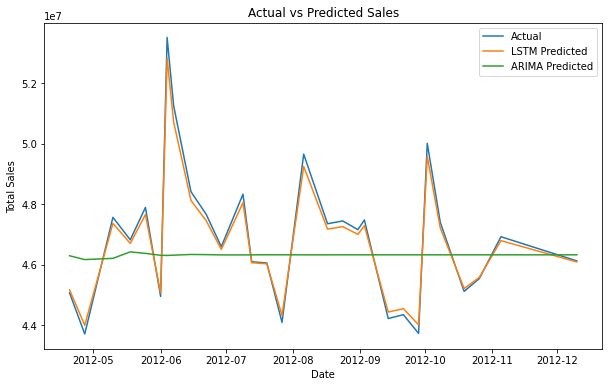

In [ ]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(test['Date'], test_data, label='Actual')
plt.plot(test['Date'], predicted_sales, label='LSTM Predicted')
plt.plot(test['Date'], predictions_arima, label='ARIMA Predicted')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()
